In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Conv2D(kernel_size=4, filters=64,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=50, validation_split=0.2)

Epoch 1/50
960/960 [==============================] - 9s 9ms/step - loss: 0.1765 - accuracy: 0.9460 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 2/50
960/960 [==============================] - 8s 8ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0495 - val_accuracy: 0.9852
Epoch 3/50
960/960 [==============================] - 8s 8ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0460 - val_accuracy: 0.9862
Epoch 4/50
960/960 [==============================] - 7s 8ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 5/50
960/960 [==============================] - 8s 8ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 6/50
960/960 [==============================] - 8s 8ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9887
Epoch 7/50
960/960 [==============================] - 8s 8ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0436 - val_accuracy: 0.9886
Epoch 

In [ ]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0714 - accuracy: 0.9905


[0.07137450575828552, 0.9904999732971191]

In [ ]:
ret_val = model.predict(x_test.reshape(-1,28,28,1))

print(f'ret_val.type : {type(ret_val)}, ret_val.shape : {ret_val.shape}')

predicted_val = np.argmax(ret_val,axis=1)

predicted_comp_list = np.equal(predicted_val, t_test)

index_label_prediction = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_comp_list) if result == False ]

print(len(index_label_prediction))



ret_val.type : <class 'numpy.ndarray'>, ret_val.shape : (10000, 10)
95


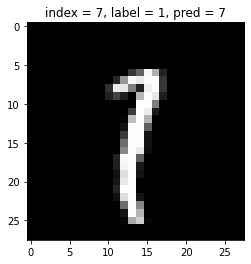

In [ ]:
false_data_index = np.random.randint(len(index_label_prediction))

mnist_index = index_label_prediction[false_data_index][0]
label = index_label_prediction[false_data_index][1]
prediction = index_label_prediction[false_data_index][2]

title_str = f'index = {false_data_index}, label = {label}, pred = {prediction}'

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img,cmap='gray')
plt.show()